In [2]:
import pandas as pd

In [45]:
import scipy.stats as st

In [3]:
file = "/Users/Lenovo/notebooks/games.csv"

## all coloums

In [4]:
gameData = pd.read_csv(file)
gameData.head()

,id,title,price_ig,discount,price_retail,price_steam,region,DLC,platform,link,availability,genre,languages,release_date,user_rating,number_comments,review,rating_review
0,1,FIFA 21,39.69,-34%,60.0,59.99,Worldwide,0,Origin,https://www.instant-gaming.com/en/6890-buy-gam...,In stock,Multiplayer Simulation Sports Soccer Runner Pv...,cn de en es fr it jp kr pl pt ru,9 October 2020,48.0,50.0,This game is boring i have bought it from EA ...,30.0
1,2,Watch Dogs Legion,47.49,-21%,60.0,NaN,Worldwide,0,Uplay,https://www.instant-gaming.com/en/2540-buy-gam...,In stock,GeForce Now Action Adventure Cooperation Multi...,cn de en es fr it jp kr pl ru,29 October 2020,61.0,20.0,Après un second volet moins mature que son aîn...,70.0
2,3,FIFA 21: 2200 FUT Points,15.89,-21%,20.0,NaN,Worldwide,1,Origin,https://www.instant-gaming.com/en/7275-buy-gam...,In stock,Multiplayer Simulation Sports Soccer Football ...,Multi,9 October 2020,65.0,1.0,Mal wieder viel zu teuer für jedes jahr das gl...,30.0
3,4,Dead by Daylight,5.48,-73%,20.0,19.99,Worldwide,0,Steam,https://www.instant-gaming.com/en/1904-buy-gam...,In stock,GeForce Now Action Cooperation Multiplayer Str...,cn de en es fr it jp kr pl pt ru,14 June 2016,83.0,382.0,All around great game. With friends it is gre...,90.0
4,5,Minecraft,19.49,-19%,24.0,NaN,Worldwide,0,Other platform,https://www.instant-gaming.com/en/442-buy-game...,In stock,Management Mac Multiplayer RPG VR,Multi,19 November 2011,90.0,541.0,Best game ever god sandboxgame adn a lot of ga...,100.0


## region coloum

In [5]:
gameData['region'].unique()

array(['Worldwide', 'Europe', 'EUR', 'ES', 'europe'], dtype=object)

In [6]:
gameData['region'].value_counts()

Worldwide    5830
Europe        945
ES             83
EUR             4
europe          1
Name: region, dtype: int64

<AxesSubplot:>

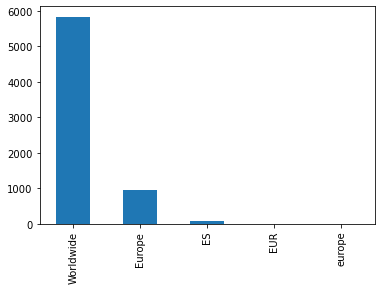

In [7]:
gameData['region'].value_counts().plot.bar()

## platform coloum

In [8]:
gameData['platform'].unique()

array(['Origin', 'Uplay', 'Steam', 'Other platform', nan, 'Rockstar',
       'Xbox', 'Battle.net', 'Xbox Play Anywhere', 'Software', 'Nintendo',
       'Bethesda', 'GOG.com', 'Playstation', 'Epic Games',
       'Microsoft Store', 'Ncsoft', 'STEAM'], dtype=object)

In [9]:
gameData['platform'].value_counts()

Steam                 5005
Xbox                   611
Nintendo               326
Uplay                  199
Origin                 191
Playstation            141
Other platform          95
Epic Games              82
Xbox Play Anywhere      48
Battle.net              37
Rockstar                21
GOG.com                 15
Bethesda                14
Microsoft Store         11
Ncsoft                   7
Software                 4
STEAM                    1
Name: platform, dtype: int64

<AxesSubplot:>

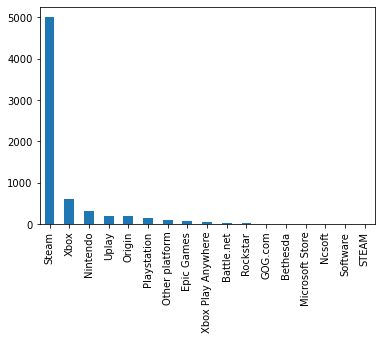

In [10]:
gameData['platform'].value_counts().plot.bar()

## user_rating coloum

In [12]:
gameData['user_rating'].describe()

count    3594.000000
mean       79.604341
std        17.018297
min        10.000000
25%        73.000000
50%        84.000000
75%        90.000000
max       100.000000
Name: user_rating, dtype: float64

<AxesSubplot:ylabel='Frequency'>

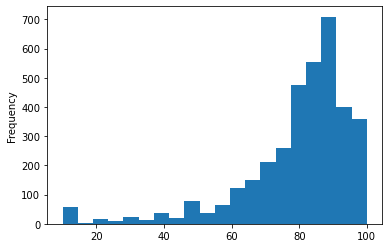

In [22]:
gameData['user_rating'].plot.hist(bins=20)

### assignment 7a - Histogram type
gameData user_rating histogram has a Power Long normal Distribution

<AxesSubplot:>

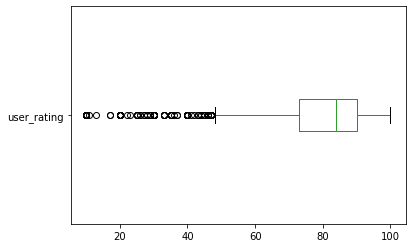

In [27]:
gameData['user_rating'].plot.box(vert = False)

### assingment 8a - confidence intervals

In [51]:
confidence = 0.90
user_rate = gameData['user_rating']
st.t.interval(confidence, len(user_rate)-1, loc=user_rate.mean(), scale=st.sem(user_rate, nan_policy='omit'))

(79.13734479653186, 80.0713363386935)

In [55]:
confidence = 0.95
st.t.interval(confidence, len(user_rate)-1, loc=user_rate.mean(), scale=st.sem(user_rate, nan_policy='omit'))

(79.04785775226834, 80.16082338295702)

In [59]:
confidence = 0.99
st.t.interval(confidence, len(user_rate)-1, loc=user_rate.mean(), scale=st.sem(user_rate, nan_policy='omit'))

(78.87292373072067, 80.33575740450469)

In [60]:
confidence = 0.9999
st.t.interval(confidence, len(user_rate)-1, loc=user_rate.mean(), scale=st.sem(user_rate, nan_policy='omit'))

(78.49924938508835, 80.70943175013701)

In [79]:
confidence = 0.95
first_ten_p = user_rate[:int(len(user_rate)*0.10)]
st.t.interval(confidence, len(first_ten_p)-1, loc=first_ten_p.mean(), scale=st.sem(first_ten_p, nan_policy='omit'))

(81.68834159243744, 83.6494962454004)

## rating_review coloum

In [82]:
gameData['rating_review'].describe()

count    3604.000000
mean       81.911765
std        23.430044
min        10.000000
25%        80.000000
50%        90.000000
75%       100.000000
max       100.000000
Name: rating_review, dtype: float64

<AxesSubplot:ylabel='Frequency'>

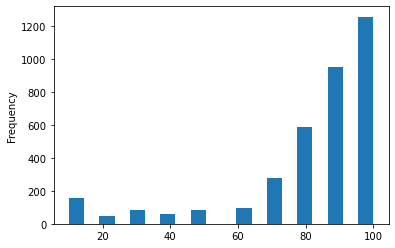

In [28]:
gameData['rating_review'].plot.hist(bins = 20)

### assingment 7b - Histogram type
gameData rating_review has a Birnbaum-Saunders (Fatigue Life) distribution

<AxesSubplot:>

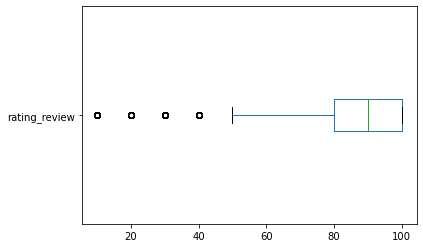

In [17]:
gameData['rating_review'].plot.box(vert = False)

### assingment 8b - confidence intervals

In [89]:
confidence = 0.90
rev_rate = gameData['rating_review']
st.t.interval(confidence, len(rev_rate)-1, loc=rev_rate.mean(), scale=st.sem(rev_rate, nan_policy='omit'))

(81.26971802953338, 82.55381138223132)

In [90]:
confidence = 0.95
st.t.interval(confidence, len(rev_rate)-1, loc=rev_rate.mean(), scale=st.sem(rev_rate, nan_policy='omit'))

(81.14668723802811, 82.67684217373659)

In [91]:
confidence = 0.99
st.t.interval(confidence, len(rev_rate)-1, loc=rev_rate.mean(), scale=st.sem(rev_rate, nan_policy='omit'))

(80.90618011982639, 82.91734929193831)

In [92]:
confidence = 0.9999
st.t.interval(confidence, len(rev_rate)-1, loc=rev_rate.mean(), scale=st.sem(rev_rate, nan_policy='omit'))

(80.39243591376037, 83.43109349800433)

In [93]:
confidence = 0.95
first_ten_p = rev_rate[:int(len(user_rate)*0.10)]
st.t.interval(confidence, len(first_ten_p)-1, loc=first_ten_p.mean(), scale=st.sem(first_ten_p, nan_policy='omit'))

(85.10072441387352, 88.34522153207242)